In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
path_add = Path("/teamspace/studios/this_studio/ML-camp/linear-regression/projects/chapter_1/dataset/SOCR-HeightWeight.csv")
df = pd.read_csv(path_add)

In [5]:
df.info(), df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


(None, np.int64(0))

In [7]:
df.head(), df.columns, df.dtypes

(   Index  Height(Inches)  Weight(Pounds)
 0      1        65.78331        112.9925
 1      2        71.51521        136.4873
 2      3        69.39874        153.0269
 3      4        68.21660        142.3354
 4      5        67.78781        144.2971,
 Index(['Index', 'Height(Inches)', 'Weight(Pounds)'], dtype='object'),
 Index               int64
 Height(Inches)    float64
 Weight(Pounds)    float64
 dtype: object)

In [8]:
df.isnull().sum()

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [9]:
df.columns = df.columns.str.lower()
df.columns

Index(['index', 'height(inches)', 'weight(pounds)'], dtype='object')

In [10]:
obj_dtypes = [col for col in df.columns if df[col].dtype == "object"]
num_dtype = [col for col in df.columns if df[col].dtype != "object"]

obj_dtypes, num_dtype

([], ['index', 'height(inches)', 'weight(pounds)'])

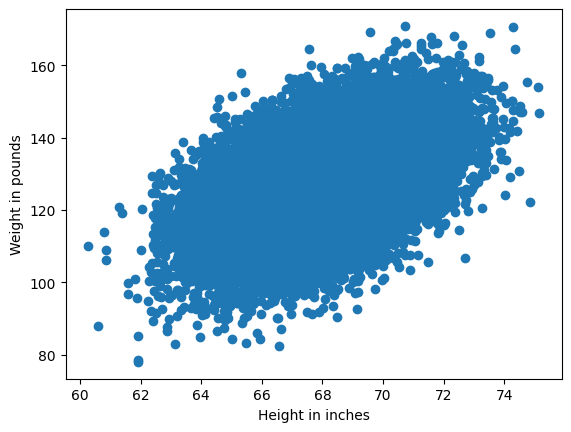

In [11]:
plt.scatter(df["height(inches)"], df["weight(pounds)"])
plt.xlabel("Height in inches")
plt.ylabel("Weight in pounds")
plt.show()

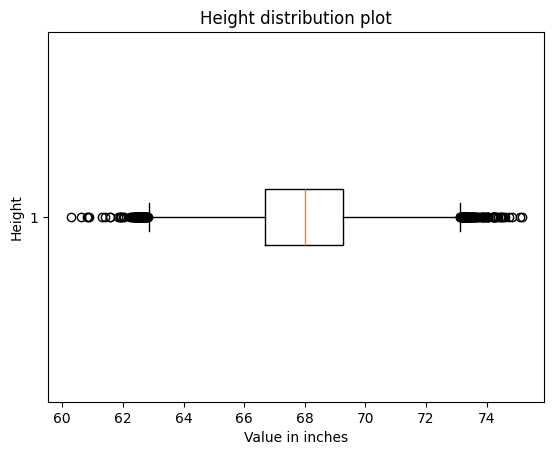

In [12]:
plt.boxplot(df["height(inches)"], vert = False)
plt.xlabel("Value in inches")
plt.ylabel("Height")
plt.title("Height distribution plot")
plt.show()

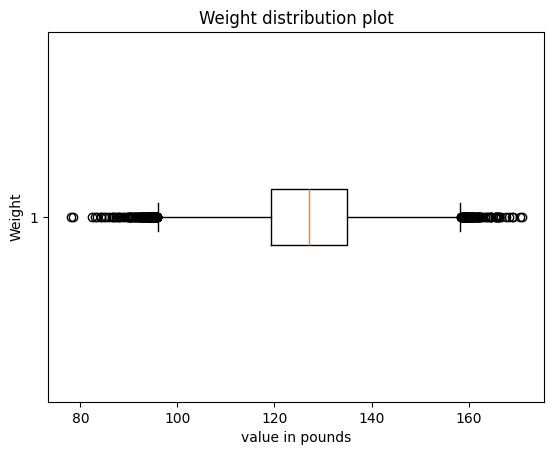

In [26]:
plt.boxplot(df["weight(pounds)"], vert = False)
plt.xlabel("value in pounds")
plt.ylabel("Weight")
plt.title("Weight distribution plot")
plt.show()

In [13]:
df.describe()

,index,height(inches),weight(pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [14]:
df = df.sample(frac=1, random_state=42).reset_index(drop = True)

In [15]:
n = len(df)
n_test = int(0.2 * n)
n_val = int(0.2 * n)
n_train = n - (n_test + n_val)

print(n, n_train, n_val, n_test)

25000 15000 5000 5000


In [16]:
x_dataset = df["height(inches)"]
y_dataset = df["weight(pounds)"]

x_dataset.shape, y_dataset.shape

((25000,), (25000,))

In [17]:
training_ds = x_dataset[:n_train]
val_ds = x_dataset[n_train:n_train+n_val]
test_ds = x_dataset[n_train+n_val:]

y_train = y_dataset[:n_train]
y_val = y_dataset[n_train:n_train+n_val]
y_test = y_dataset[n_train+n_val:]

len(training_ds), len(val_ds), len(test_ds)

(15000, 5000, 5000)

In [18]:
def rmse(y, y_pred):
    error = (y_pred - y) ** 2
    return np.mean(error)

In [22]:
# calculating using normal form
def train_normal_form(x,y,r = 0.01):
    ones = np.ones(x.shape[0])
    x = np.column_stack([ones,x])
    
    xtx = x.T.dot(x)
    xtx += r * np.eye(x.shape[1])
    xtx_inv = np.linalg.inv(xtx)

    w_full = xtx_inv.dot(x.T).dot(y)

    return w_full[0], w_full[1:]

In [20]:
y_train_log = np.log1p(y_train)

In [25]:
reg_rates = [0.001,0.01,0.1,1,10]

for r in reg_rates:
    wo, wi = train_normal_form(training_ds, y_train_log, r)
    y_pred = wo + wi * training_ds
    error = rmse(y_train_log, y_pred)
    print(f"{r} - {error}")

0.001 - 0.006418670333942779
0.01 - 0.006418676051635939
0.1 - 0.00641923910338704
1 - 0.006467816490721004
10 - 0.0081095025387472
